# Hoja de Trabajo 1

Alina Carías (22539), Daniel Machic (), Ariela Mishaan (22052)

## Librerias

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def show_bgr(img_bgr, title=""):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6,4))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis("off")
    plt.show()

def show_gray(img_gray, title=""):
    plt.figure(figsize=(6,4))
    plt.imshow(img_gray, cmap="gray", vmin=0, vmax=255)
    plt.title(title)
    plt.axis("off")
    plt.show()

## Ejercicio 1 - Contraste y brillo vectorizado

In [ ]:
def manual_contrast_brightness(image: np.ndarray, alpha: float, beta: float) -> np.ndarray:
    if image.dtype != np.uint8:
        raise TypeError("La imagen de entrada debe ser uint8.")

    img = image.astype(np.float32) / 255.0          
    beta_f = beta / 255.0                           

    out = alpha * img + beta_f                      # vectorizado
    out = np.clip(out, 0.0, 1.0)                    
    out_u8 = (out * 255.0).astype(np.uint8)         # regreso a uint8
    return out_u8

### PRUEBA

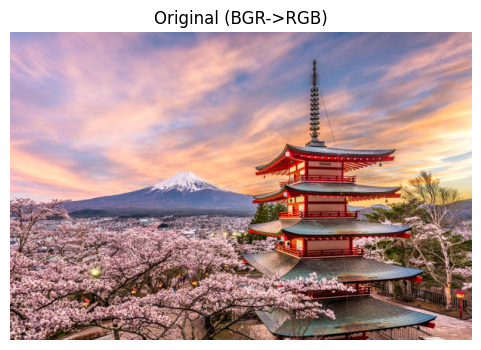

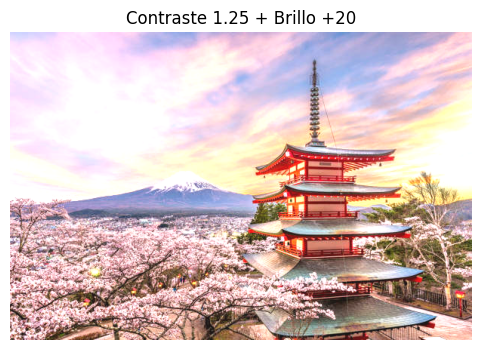

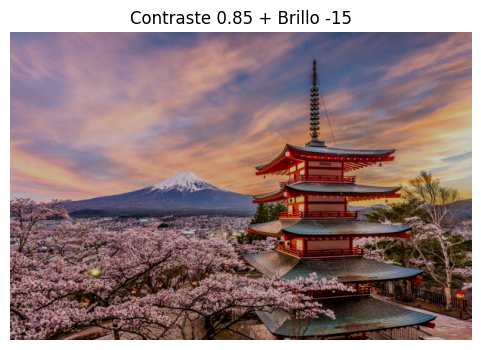

In [ ]:
path = "test.jpg"  
img = cv2.imread(path)

if img is None:
    raise FileNotFoundError(f"No se puede leer la imagen: {path}")

show_bgr(img, "Original (BGR->RGB)")

cb1 = manual_contrast_brightness(img, alpha=1.25, beta=20)
show_bgr(cb1, "Contraste 1.25 + Brillo +20")

cb2 = manual_contrast_brightness(img, alpha=0.85, beta=-15)
show_bgr(cb2, "Contraste 0.85 + Brillo -15")


## Ejercicio 2 - Corrección Gamma Manual

In [ ]:
def manual_gamma_correction(image: np.ndarray, gamma: float) -> np.ndarray:

    if image.dtype != np.uint8:
        raise TypeError("La imagen de entrada debe ser uint8.")
    if gamma <= 0:
        raise ValueError("gamma debe ser > 0.")

    img = image.astype(np.float32) / 255.0         
    out = np.power(img, gamma)                      # vectorizado
    out = np.clip(out, 0.0, 1.0)
    out_u8 = (out * 255.0).astype(np.uint8)
    return out_u8


### PRUEBA

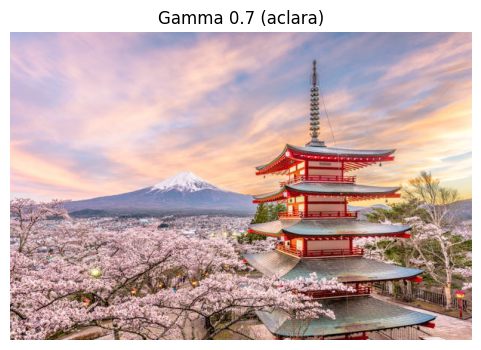

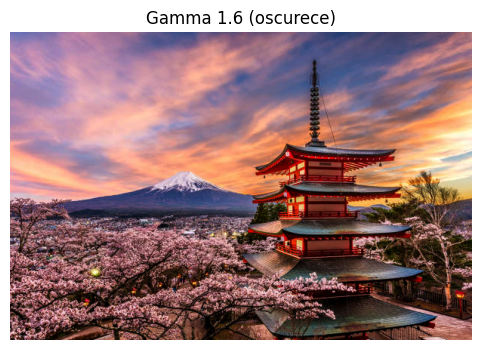

In [10]:
gm1 = manual_gamma_correction(img, gamma=0.7)
show_bgr(gm1, "Gamma 0.7 (aclara)")

gm2 = manual_gamma_correction(img, gamma=1.6)
show_bgr(gm2, "Gamma 1.6 (oscurece)")


## Ejercicio 3 - Segmentación Cromática

In [11]:
def hsv_segmentation(image_bgr: np.ndarray, lower: np.ndarray, upper: np.ndarray):
    if image_bgr.dtype != np.uint8:
        raise TypeError("La imagen de entrada debe ser uint8.")

    hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

    h, s, v = hsv[:, :, 0], hsv[:, :, 1], hsv[:, :, 2]

    mask_bool = (
        (h >= lower[0]) & (h <= upper[0]) &
        (s >= lower[1]) & (s <= upper[1]) &
        (v >= lower[2]) & (v <= upper[2])
    )

    mask = (mask_bool.astype(np.uint8) * 255)

    segmented = image_bgr.copy()
    segmented[mask == 0] = (0, 0, 0)

    return mask, segmented


### Elección de rangos

In [14]:
# Ejemplo: ROSADO
lower_pink = np.array([160, 60, 60], dtype=np.uint8)
upper_pink = np.array([175, 255, 255], dtype=np.uint8)

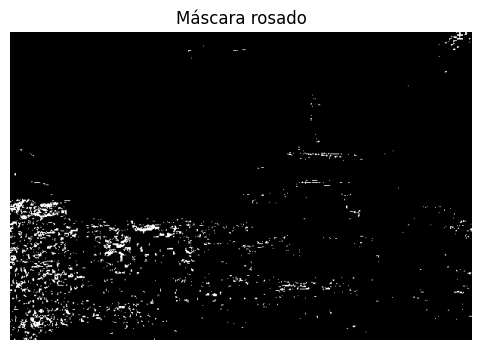

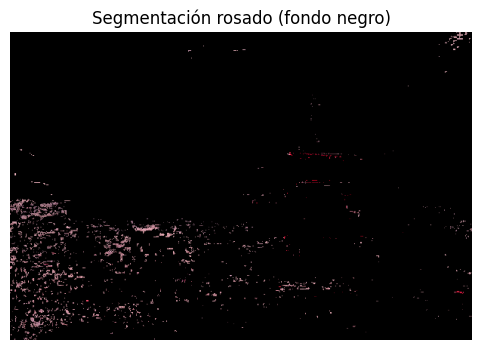

In [15]:
mask, seg = hsv_segmentation(img, lower_pink, upper_pink)

show_gray(mask, "Máscara rosado")
show_bgr(seg, "Segmentación rosado (fondo negro)")
